# Λ-Type Three-Level: Weak Pulse, No Coupling

Time taken to solve this problem on a 2013 MacBook Pro:
**24min 37s**

## Define the Problem

In [1]:
mb_solve_json = """
{
  "atom": {
    "decays": [
      { "channels": [[0,1], [1,2]], 
        "rate": 0.0
      }
    ],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 1.0e-3,
        "rabi_freq_t_args": 
          {
             "ampl": 1.0,
             "centre": 0.0,
             "fwhm": 1.0
          },
        "rabi_freq_t_func": "gaussian"
      },
      {
        "coupled_levels": [[1, 2]],
        "detuning": 0.0,
        "detuning_positive": false,
        "label": "coupling",
        "rabi_freq": 0.0,
        "rabi_freq_t_args": 
        {
          "ampl": 1.0,
          "fwhm": 0.2,
          "on": -1.0, 
          "off": 9.0
          },
        "rabi_freq_t_func": "ramp_onoff"
      }
    ],
    "num_states": 3
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 120,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 140,
  "z_steps_inner": 10,
  "num_density_z_func": "square",
  "num_density_z_args": {
    "on": 0.0,
    "off": 1.0,
    "ampl": 1.0
  },
  "interaction_strengths": [100.0, 100.0],
  "velocity_classes": {},
  "method": "mesolve",
  "opts": {},
  "savefile": "qu/mb-solve-lambda-weak-pulse-more-atoms-no-coupling" 
}
"""

In [2]:
from maxwellbloch import mb_solve
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)

## Solve the Problem

In [3]:
%time Omegas_zt, states_zt = mb_solve_00.mbsolve(recalc=False)

10.0%. Run time:  92.22s. Est. time left: 00:00:13:49


20.0%. Run time: 213.00s. Est. time left: 00:00:14:11


30.0%. Run time: 387.66s. Est. time left: 00:00:15:04


40.0%. Run time: 558.79s. Est. time left: 00:00:13:58


50.0%. Run time: 708.79s. Est. time left: 00:00:11:48


60.0%. Run time: 833.76s. Est. time left: 00:00:09:15


70.0%. Run time: 936.84s. Est. time left: 00:00:06:41


80.0%. Run time: 1017.79s. Est. time left: 00:00:04:14


90.0%. Run time: 1084.29s. Est. time left: 00:00:02:00


Total run time: 1158.32s
Saving MBSolve to qu/mb-solve-lambda-weak-pulse-more-atoms-no-coupling .qu
CPU times: user 19min 8s, sys: 4.02 s, total: 19min 12s
Wall time: 19min 18s


## Plot Output

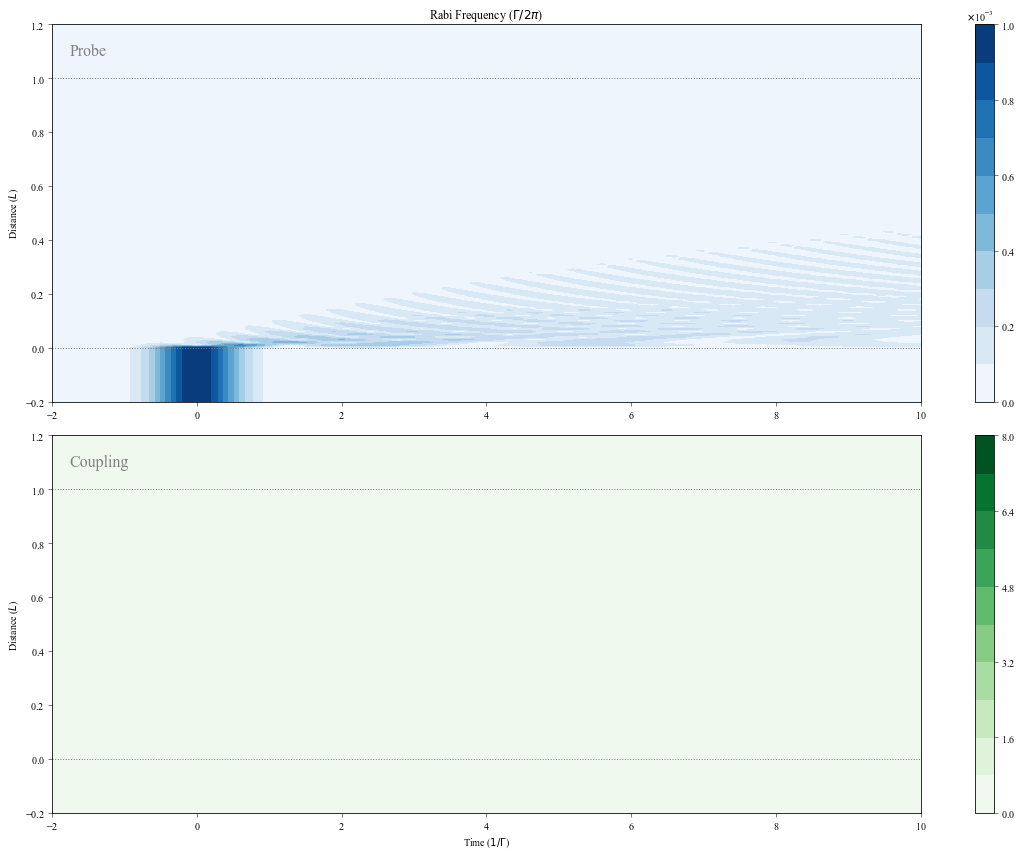

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

fig = plt.figure(1, figsize=(16, 12))

# Probe 
ax = fig.add_subplot(211)
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_ylabel('Distance ($L$)')
ax.text(0.02, 0.95, 'Probe',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes, color='grey', fontsize=16)
plt.colorbar(cf)

# Coupling
ax = fig.add_subplot(212)
cmap_range = np.linspace(0.0, 8.0, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[1]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Greens)
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
ax.text(0.02, 0.95, 'Coupling',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes, color='grey', fontsize=16)
plt.colorbar(cf)

# Both
for ax in fig.axes:
    for y in [0.0, 1.0]:
        ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.tight_layout()
plt.savefig('images/mb-solve-lambda-weak-pulse-more-atoms-no-coupling.png')

## Analysis

With no coupling, the weak probe pulse is absorbed just like in the two-level atom case.